In [1]:

import numpy as np
import pandas as pd
import datetime as dt
import random

 
from pairs_trader_core import read_yf_data, PairsTrader, load_iv_data
from pairs_analysis_utils import run_single_pair_parallel
import matplotlib.pyplot as plt
%matplotlib inline

/Users/am/07022025/pairs_trader_core.py:419: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


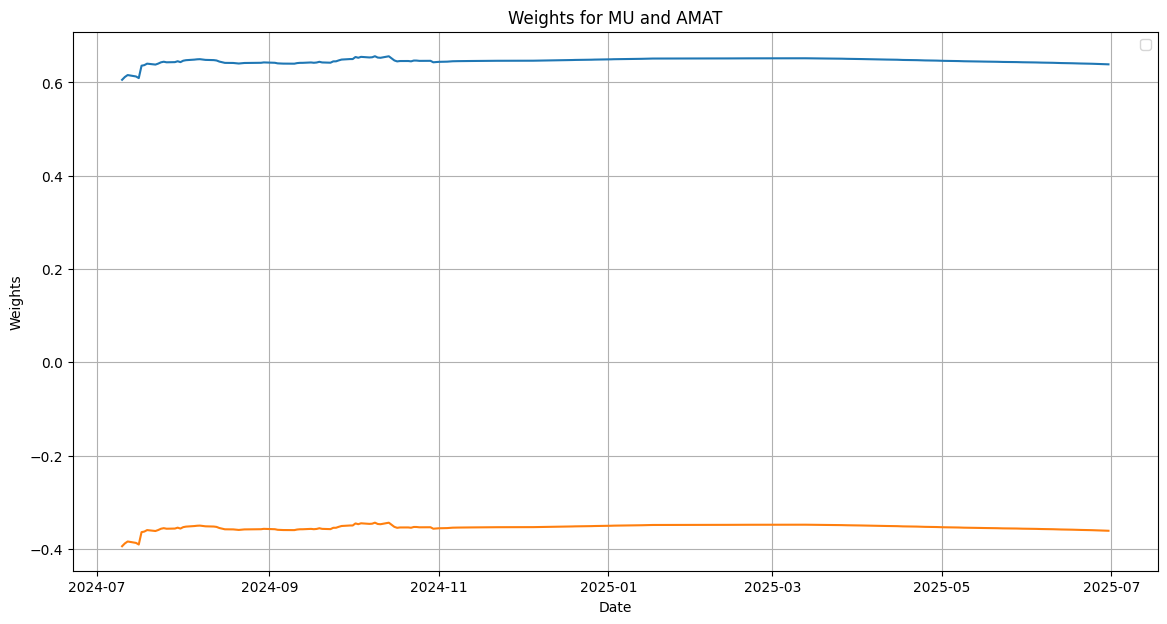

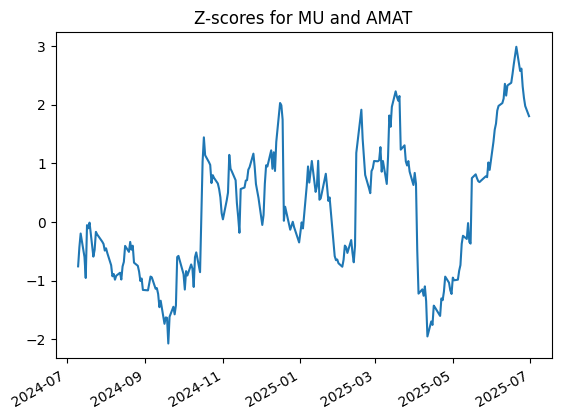

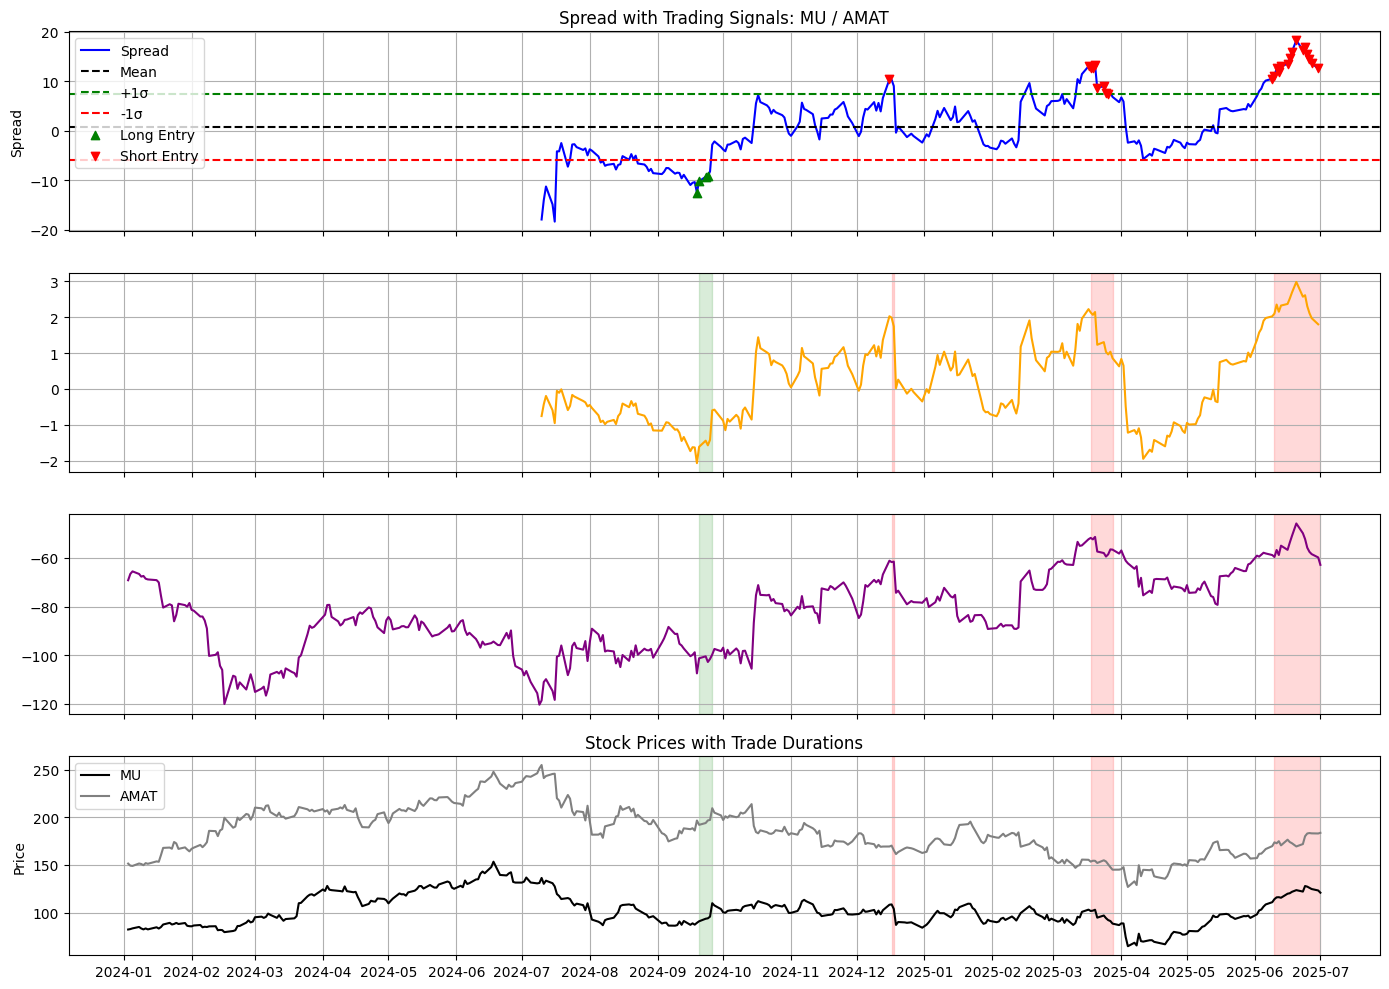

,Entry Date,Entry Z-Score,Entry Position,Stock 1,Stock 2,Stock 1 Entry Price,Stock 2 Entry Price,Weight Stock 1,Weight Stock 2,Option Type 1,Option Type 2,Entry Option Size 1,Entry Option Size 2,Option 1 Entry Price,Option 2 Entry Price,IV Stock 1 Entry,IV Stock 2 Entry,Entry Option Cost,Exit Date,Exit Z-Score,Stock 1 Exit Price,Stock 2 Exit Price,Exit Weight Stock 1,Exit Weight Stock 2,Duration,Option 1 Exit Price,Option 2 Exit Price,IV Stock 1 Exit,IV Stock 2 Exit,Exit Option Value,Realized Return
0,2024-09-20,-2.072229,1,MU,AMAT,90.900002,192.160004,0.644319,-0.355681,call,put,0.644319,0.355681,7.678058,9.913203,0.583612,0.391336,8.473057,2024-09-26,-1.421513,109.879997,209.610001,0.644319,-0.355681,5,19.998873,4.134365,0.431410,0.421162,14.356169,0.694332
1,2024-12-17,2.026029,-1,MU,AMAT,108.599998,170.339996,0.647616,-0.352384,put,call,0.647616,0.352384,9.362693,8.981554,0.640470,0.355368,9.228386,2024-12-18,1.986626,103.900002,165.449997,0.647616,-0.352384,2,11.757342,9.376702,0.655683,0.483834,10.918443,0.183137
2,2025-03-18,2.224564,-1,MU,AMAT,101.720001,153.509995,0.651723,-0.348277,put,call,0.651723,0.348277,8.729864,9.331622,0.637657,0.413286,8.939442,2025-03-28,1.036315,88.440002,145.059998,0.651723,-0.348277,9,14.157046,4.357431,0.476943,0.413508,10.744069,0.201872
3,2025-06-10,2.024221,-1,MU,AMAT,114.139999,173.770004,0.642406,-0.357594,put,call,0.642406,0.357594,8.335313,9.169950,0.545493,0.355680,8.633774,2025-07-01,1.801455,120.889999,183.759995,0.642406,-0.357594,15,1.944914,12.778304,0.389169,0.334189,5.818871,-0.326034


In [2]:
stock_pairs = pd.read_csv('~/data/stable_pairs.csv')
#for i in range(len(stock_pairs)):
#    print(f"{i}: {stock_pairs.iloc[i][0]} - {stock_pairs.iloc[i][1]}")
import random
rand_pair = random.randint(0, len(stock_pairs)-1)
pair = ["MU","AMAT"]

# Assuming yf_data is a DataFrame with historical prices for these stocks
yf_data = read_yf_data(file_name="~/data/yf_data1.csv")
iv_data = load_iv_data()  # Load implied volatility data
#end_date = dt.now().strftime("%Y-%m-%d")
#start_date = (pd.to_datetime(end_date) - timedelta(days=2*365)).strftime("%Y-%m-%d")
end_date,start_date ='2025-07-01', '2024-01-03'

#end_date = dt.datetime.now().strftime("%Y-%m-%d")
#start_date = (dt.datetime.now() - dt.timedelta(days=int(3.0*365))).strftime("%Y-%m-%d")
yf_data.index = pd.to_datetime(yf_data.index)
trader = PairsTrader(pair[0],pair[1], start_date, end_date,
                      yf_data=yf_data,
                      iv_data=iv_data,
                      use_options=True,
                      
                      )
trader.run_strategy()
trader.plot_weights()
#trader.spread_series.plot(title=f"Spread for {pair[0]} and {pair[1]}")

trader.z_scores.plot(title=f"Z-scores for {pair[0]} and {pair[1]}")


trader.plot_positions()


plt.show()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pd.DataFrame(trader.trade_log)
